In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)
    for k in k_vals:
        lm_sum = 0
        for m in range(k):
            num_windows = int(np.floor((n - m) / k))
            temp_sum = 0
            for i in range(num_windows):
                start_index = i * k + m
                end_index = start_index + k
                temp_sum += np.abs(sig[start_index:end_index].mean())
            lm_sum += (1 / (num_windows * k)) * temp_sum
        lk[k - 1] = (lm_sum * (n / k)**2) / ((n - 1) / k)
    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [ ]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [ ]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

***To use machine learning models with the actual data***

In [ ]:
# Set the file path for only normal subjects
file_path = "/content/drive/MyDrive/Normaldata_2sec"

# List all files in the directory
file_list = os.listdir(file_path)

# Filter DAT files
dat_files = [file for file in file_list if file.endswith('.dat')]

#Output dataset
dataset_hfd = np.zeros((200, 20), dtype=np.float64)

#Count for first part of the dataset
count = 0

for file in dat_files:
    path = os.path.join(file_path, file)
    data = np.loadtxt(path)
    for i in range(19):
        dataset_hfd[count, i] = higuchi_fd(data[i, :], 6)
    dataset_hfd[count, 19] = 0 #Normal
    count = count + 1

# Set the file path for only OCD subjects
file_path = "/content/drive/MyDrive/Patientdata_2sec"

# List all files in the directory
file_list = os.listdir(file_path)

# Filter DAT files
dat_files = [file for file in file_list if file.endswith('.dat')]

#Count for second part of the dataset
count = 100

for file in dat_files:
    path = os.path.join(file_path, file)
    data = np.loadtxt(path)
    for i in range(19):
        dataset_hfd[count, i] = higuchi_fd(data[i, :], 6)
    dataset_hfd[count, 19] = 1 #OCD
    count = count + 1

print("Dataset shape:", dataset_hfd.shape)

Dataset shape: (200, 20)


In [ ]:
# Extract features (X) and output variable (y)
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

# Define the number of samples for training
num_samples = len(y)
train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Randomly select indices for training and testing
indices = np.arange(num_samples)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split the data into training and testing sets
X_train_hfd, X_test_hfd = X[train_indices], X[test_indices]
y_train_hfd, y_test_hfd = y[train_indices], y[test_indices]

In [ ]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

In [ ]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.53125
Training Precision: 0.5128205128205128
Training Recall: 0.5194805194805194
Training F1: 0.5161290322580645
Test Accuracy: 0.55
Test Precision: 0.6363636363636364
Test Recall: 0.5833333333333334
Test F1: 0.6086956521739131


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.9625
Training Precision: 1.0
Training Recall: 0.9285714285714286
Training F1: 0.962962962962963
Test Accuracy: 0.875
Test Precision: 0.9090909090909091
Test Recall: 0.8695652173913043
Test F1: 0.888888888888889


In [ ]:
rf_classifier.feature_importances_

array([0.0486947 , 0.06409558, 0.09912597, 0.03680548, 0.05328151,
       0.05757018, 0.06907833, 0.03933016, 0.08927549, 0.03877523,
       0.07513518, 0.03557186, 0.06101811, 0.03513042, 0.05682572,
       0.03529503, 0.02671612, 0.04926627, 0.02900866])

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.85
Test Precision: 0.7272727272727273
Test Recall: 1.0
Test F1: 0.8421052631578948


***Naive Bayes***

In [ ]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.66875
Training Precision: 0.782051282051282
Training Recall: 0.6288659793814433
Training F1: 0.6971428571428572
Test Accuracy: 0.65
Test Precision: 0.8636363636363636
Test Recall: 0.6333333333333333
Test F1: 0.7307692307692307


***SVM***

In [ ]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

#fit_and_print(rf_classifier3, X_train, y_train, X_test, y_test)
fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.875
Training Precision: 0.8461538461538461
Training Recall: 0.8918918918918919
Training F1: 0.868421052631579
Test Accuracy: 0.875
Test Precision: 0.8636363636363636
Test Recall: 0.9047619047619048
Test F1: 0.8837209302325582


***SVM - using Regularization***

In [ ]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.80625
Training Precision: 0.7692307692307693
Training Recall: 0.821917808219178
Training F1: 0.794701986754967
Test Accuracy: 0.8
Test Precision: 0.8181818181818182
Test Recall: 0.8181818181818182
Test F1: 0.8181818181818182


In [ ]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.8125
Training Precision: 0.7692307692307693
Training Recall: 0.8333333333333334
Training F1: 0.8
Test Accuracy: 0.85
Test Precision: 0.8181818181818182
Test Recall: 0.9
Test F1: 0.8571428571428572


***KNN***

In [ ]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.89375
Training Precision: 0.9102564102564102
Training Recall: 0.8765432098765432
Training F1: 0.8930817610062893
Test Accuracy: 0.875
Test Precision: 1.0
Test Recall: 0.8148148148148148
Test F1: 0.8979591836734693


In [ ]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Training Accuracy: 0.94375
Training Precision: 0.9358974358974359
Training Recall: 0.948051948051948
Training F1: 0.9419354838709677
Test Accuracy: 0.95
Test Precision: 0.9545454545454546
Test Recall: 0.9545454545454546
Test F1: 0.9545454545454546


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



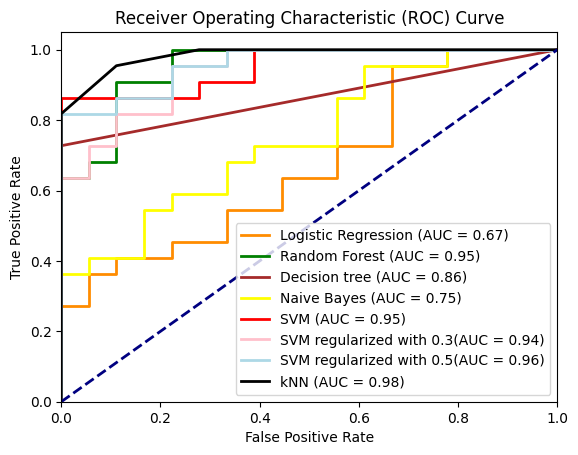

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

***Entropy***

In [ ]:
# Set the file path for normal and OCD subjects
normal_path = "/content/drive/MyDrive/Normaldata_2sec"
patient_path = "/content/drive/MyDrive/Patientdata_2sec"

# Initialize dataset
num_samples = 200  # Assuming 100 normal and 100 OCD samples
num_channels = 19  # Number of EEG channels
dataset_ent = np.zeros((num_samples, num_channels + 1), dtype=np.float64)  # +1 for the label

# Process normal subjects
count = 0
for file in os.listdir(normal_path):
    if file.endswith('.dat'):
        path = os.path.join(normal_path, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            dataset_ent[count, i] = shannonentropy(data[i, :])
        dataset_ent[count, -1] = 0  # Label for normal
        count += 1

# Process patient subjects
for file in os.listdir(patient_path):
    if file.endswith('.dat'):
        path = os.path.join(patient_path, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            dataset_ent[count, i] = shannonentropy(data[i, :])
        dataset_ent[count, -1] = 1  # Label for patient
        count += 1

print("Dataset shape:", dataset_ent.shape)

Dataset shape: (200, 20)


In [ ]:
# Extract features (X) and output variable (y)
X1 = dataset_ent[:, :-1]
y1 = dataset_ent[:, -1]

# Split the data into training and testing sets
X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]

In [ ]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.69375
Training Precision: 0.6923076923076923
Training Recall: 0.6835443037974683
Training F1: 0.6878980891719746
Test Accuracy: 0.7
Test Precision: 0.6818181818181818
Test Recall: 0.75
Test F1: 0.7142857142857143


In [ ]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.9875
Training Precision: 1.0
Training Recall: 0.975
Training F1: 0.9873417721518987
Test Accuracy: 0.9
Test Precision: 0.8636363636363636
Test Recall: 0.95
Test F1: 0.9047619047619048


In [ ]:
ent_rf_classifier.feature_importances_

array([0.04703004, 0.07437382, 0.11981822, 0.04672707, 0.03190452,
       0.05184681, 0.04048992, 0.04244755, 0.05441062, 0.04308553,
       0.07044387, 0.04694757, 0.06867303, 0.03056464, 0.07244693,
       0.03556654, 0.05174209, 0.03501055, 0.03647067])

In [ ]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.675
Test Precision: 0.5909090909090909
Test Recall: 0.7647058823529411
Test F1: 0.6666666666666667


In [ ]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.64375
Training Precision: 0.7948717948717948
Training Recall: 0.6019417475728155
Training F1: 0.6850828729281767
Test Accuracy: 0.65
Test Precision: 0.8636363636363636
Test Recall: 0.6333333333333333
Test F1: 0.7307692307692307


In [ ]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.8125
Training Precision: 0.7564102564102564
Training Recall: 0.8428571428571429
Training F1: 0.7972972972972971
Test Accuracy: 0.8
Test Precision: 0.7727272727272727
Test Recall: 0.85
Test F1: 0.8095238095238095


In [ ]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.75
Training Precision: 0.7692307692307693
Training Recall: 0.7317073170731707
Training F1: 0.7499999999999999
Test Accuracy: 0.8
Test Precision: 0.7727272727272727
Test Recall: 0.85
Test F1: 0.8095238095238095


In [ ]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.76875
Training Precision: 0.7564102564102564
Training Recall: 0.7662337662337663
Training F1: 0.7612903225806451
Test Accuracy: 0.775
Test Precision: 0.7272727272727273
Test Recall: 0.8421052631578947
Test F1: 0.7804878048780488


In [ ]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.83125
Training Precision: 0.8717948717948718
Training Recall: 0.8
Training F1: 0.834355828220859
Test Accuracy: 0.925
Test Precision: 1.0
Test Recall: 0.88
Test F1: 0.9361702127659575


In [ ]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Training Accuracy: 0.925
Training Precision: 0.9358974358974359
Training Recall: 0.9125
Training F1: 0.9240506329113924
Test Accuracy: 0.75
Test Precision: 0.7272727272727273
Test Recall: 0.8
Test F1: 0.761904761904762


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


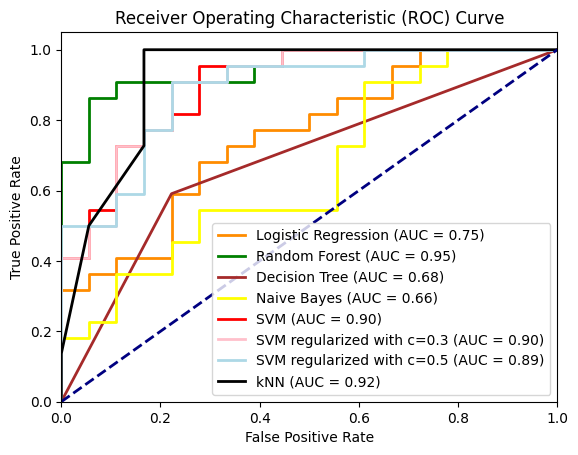

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Set the file paths for normal and OCD subjects
normal_path_kfd = "/content/drive/MyDrive/Normaldata_2sec"
patient_path_kfd = "/content/drive/MyDrive/Patientdata_2sec"

# Initialize dataset
num_samples = 200  # Assuming 100 normal and 100 OCD samples
num_channels = 19  # Number of EEG channels
dataset_kfd = np.zeros((num_samples, num_channels + 1), dtype=np.float64)  # +1 for the label

# Process normal subjects
count = 0
for file in os.listdir(normal_path_kfd):
    if file.endswith('.dat'):
        path = os.path.join(normal_path_kfd, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            dataset_kfd[count, i] = katz_fd(data[i, :])
        dataset_kfd[count, -1] = 0  # Label for normal
        count += 1

# Process patient subjects
for file in os.listdir(patient_path_kfd):
    if file.endswith('.dat'):
        path = os.path.join(patient_path_kfd, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            dataset_kfd[count, i] = katz_fd(data[i, :])
        dataset_kfd[count, -1] = 1  # Label for OCD
        count += 1

print("Dataset shape:", dataset_kfd.shape)

Dataset shape: (200, 20)


In [ ]:
# Extract features (X) and output variable (y)
X2 = dataset_kfd[:, :-1]
y2 = dataset_kfd[:, -1]

# Split the data into training and testing sets
X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


In [ ]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.59375
Training Precision: 0.4230769230769231
Training Recall: 0.6226415094339622
Training F1: 0.5038167938931297
Test Accuracy: 0.475
Test Precision: 0.36363636363636365
Test Recall: 0.5333333333333333
Test F1: 0.43243243243243246


In [ ]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.95625
Training Precision: 1.0
Training Recall: 0.9176470588235294
Training F1: 0.9570552147239264
Test Accuracy: 0.925
Test Precision: 0.9090909090909091
Test Recall: 0.9523809523809523
Test F1: 0.9302325581395349


In [ ]:
kfd_rf_classifier.feature_importances_

array([0.08772466, 0.04121953, 0.01990348, 0.01210948, 0.04037907,
       0.19295822, 0.03887057, 0.01827338, 0.11706811, 0.05861781,
       0.02152356, 0.01718947, 0.05412583, 0.09600793, 0.02514757,
       0.07231222, 0.05970385, 0.01801032, 0.00885495])

In [ ]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.925
Test Precision: 0.8636363636363636
Test Recall: 1.0
Test F1: 0.9268292682926829


In [ ]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.625
Training Precision: 0.7948717948717948
Training Recall: 0.5849056603773585
Training F1: 0.6739130434782609
Test Accuracy: 0.65
Test Precision: 0.8181818181818182
Test Recall: 0.6428571428571429
Test F1: 0.7200000000000001


In [ ]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.94375
Training Precision: 0.9615384615384616
Training Recall: 0.9259259259259259
Training F1: 0.9433962264150944
Test Accuracy: 0.95
Test Precision: 0.9545454545454546
Test Recall: 0.9545454545454546
Test F1: 0.9545454545454546


In [ ]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Training Accuracy: 0.90625
Training Precision: 0.9615384615384616
Training Recall: 0.8620689655172413
Training F1: 0.9090909090909091
Test Accuracy: 0.925
Test Precision: 0.9545454545454546
Test Recall: 0.9130434782608695
Test F1: 0.9333333333333332


In [ ]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.925
Training Precision: 0.9615384615384616
Training Recall: 0.8928571428571429
Training F1: 0.9259259259259259
Test Accuracy: 0.925
Test Precision: 0.9545454545454546
Test Recall: 0.9130434782608695
Test F1: 0.9333333333333332


In [ ]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.93125
Training Precision: 0.9615384615384616
Training Recall: 0.9036144578313253
Training F1: 0.9316770186335404
Test Accuracy: 0.925
Test Precision: 0.9545454545454546
Test Recall: 0.9130434782608695
Test F1: 0.9333333333333332


In [ ]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Training Accuracy: 0.96875
Training Precision: 0.9871794871794872
Training Recall: 0.9506172839506173
Training F1: 0.9685534591194969
Test Accuracy: 0.95
Test Precision: 0.9545454545454546
Test Recall: 0.9545454545454546
Test F1: 0.9545454545454546


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


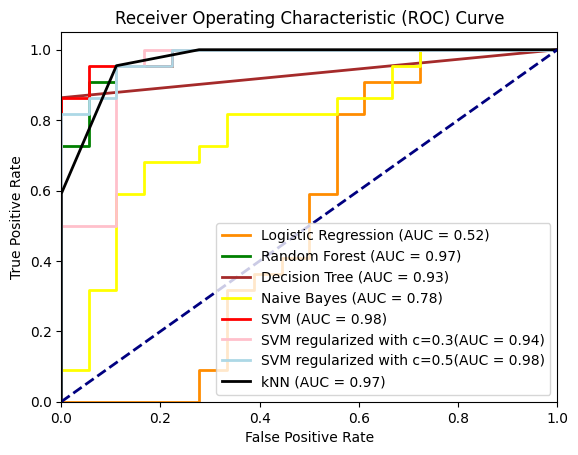

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Here, we will calculate the HFD, KFD and Entropy for the synthetic data as well

In [ ]:
# Set the file path for only normal subjects
file_path = "/content/drive/MyDrive/sysnethicnormal"

# List all files in the directory
file_list = os.listdir(file_path)

# Filter DAT files
dat_files = [file for file in file_list if file.endswith('.dat')]

#Output dataset
syn_dataset_hfd = np.zeros((400, 20), dtype=np.float64)

#Count for first part of the dataset
count = 0

for file in dat_files:
    path = os.path.join(file_path, file)
    data = np.loadtxt(path)
    for i in range(19):
        syn_dataset_hfd[count, i] = higuchi_fd(data[i, :], 6)
    syn_dataset_hfd[count, 19] = 0 #Normal
    count = count + 1


# Set the file path for only OCD subjects
file_path = "/content/drive/MyDrive/sysnethic"

# List all files in the directory
file_list = os.listdir(file_path)

# Filter DAT files
dat_files = [file for file in file_list if file.endswith('.dat')]

#Count for second part of the dataset
count = 200

for file in dat_files:
    path = os.path.join(file_path, file)
    data = np.loadtxt(path)
    for i in range(19):
        syn_dataset_hfd[count, i] = higuchi_fd(data[i, :], 6)
    syn_dataset_hfd[count, 19] = 1 #OCD
    count = count + 1

print(syn_dataset_hfd.shape)

(400, 20)


In [ ]:
# Set the file path for normal and OCD subjects
normal_path = "/content/drive/MyDrive/sysnethicnormal"
patient_path = "/content/drive/MyDrive/sysnethic"

# Initialize dataset
num_samples = 400  # Assuming 200 normal and 200 OCD samples
num_channels = 19  # Number of EEG channels
syn_dataset_ent = np.zeros((num_samples, num_channels + 1), dtype=np.float64)  # +1 for the label

# Process normal subjects
count = 0
for file in os.listdir(normal_path):
    if file.endswith('.dat'):
        path = os.path.join(normal_path, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            syn_dataset_ent[count, i] = shannonentropy(data[i, :])
        syn_dataset_ent[count, -1] = 0  # Label for normal
        count += 1

# Process patient subjects
for file in os.listdir(patient_path):
    if file.endswith('.dat'):
        path = os.path.join(patient_path, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            syn_dataset_ent[count, i] = shannonentropy(data[i, :])
        syn_dataset_ent[count, -1] = 1  # Label for patient
        count += 1

print("Dataset shape:", syn_dataset_ent.shape)

Dataset shape: (400, 20)


In [ ]:
# Set the file paths for normal and OCD subjects
normal_path_kfd = "/content/drive/MyDrive/sysnethicnormal"
patient_path_kfd = "/content/drive/MyDrive/sysnethic"

# Initialize dataset
num_samples = 400  # Assuming 200 normal and 200 OCD samples
num_channels = 19  # Number of EEG channels
syn_dataset_kfd = np.zeros((num_samples, num_channels + 1), dtype=np.float64)  # +1 for the label

# Process normal subjects
count = 0
for file in os.listdir(normal_path_kfd):
    if file.endswith('.dat'):
        path = os.path.join(normal_path_kfd, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            syn_dataset_kfd[count, i] = katz_fd(data[i, :])
        syn_dataset_kfd[count, -1] = 0  # Label for normal
        count += 1

# Process patient subjects
for file in os.listdir(patient_path_kfd):
    if file.endswith('.dat'):
        path = os.path.join(patient_path_kfd, file)
        data = np.loadtxt(path)
        for i in range(num_channels):
            syn_dataset_kfd[count, i] = katz_fd(data[i, :])
        syn_dataset_kfd[count, -1] = 1  # Label for OCD
        count += 1

print("Dataset shape:", syn_dataset_kfd.shape)

Dataset shape: (400, 20)


Combining the actual and the synthetic data

In [ ]:
# Assuming syn_dataset_kfd and dataset_kfd are numpy arrays with the same number of columns
combined_hfd_dataset = np.vstack((dataset_hfd, syn_dataset_hfd))

# Check the shape of the combined dataset
print("Shape of combined dataset:", combined_hfd_dataset.shape)

Shape of combined dataset: (600, 20)


In [ ]:
# Assuming syn_dataset_kfd and dataset_kfd are numpy arrays with the same number of columns
combined_ent_dataset = np.vstack((dataset_ent, syn_dataset_ent))

# Check the shape of the combined dataset
print("Shape of combined dataset:", combined_ent_dataset.shape)

Shape of combined dataset: (600, 20)


In [ ]:
# Assuming syn_dataset_kfd and dataset_kfd are numpy arrays with the same number of columns
combined_kfd_dataset = np.vstack((dataset_kfd, syn_dataset_kfd))

# Check the shape of the combined dataset
print("Shape of combined dataset:", combined_kfd_dataset.shape)

Shape of combined dataset: (600, 20)


In [ ]:
# Extract features (X) and output variable (y)
c_hfd_X = combined_hfd_dataset[:, :-1]
c_hfd_y = combined_hfd_dataset[:, -1]

# Define the number of samples for training
num_samples = len(c_hfd_y)
train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Randomly select indices for training and testing
indices = np.arange(num_samples)
np.random.shuffle(indices)

c_train_indices = indices[:train_size]
c_test_indices = indices[train_size:]

# Split the data into training and testing sets
c_X_train_hfd, c_X_test_hfd = c_hfd_X[c_train_indices], c_hfd_X[c_test_indices]
c_y_train_hfd, c_y_test_hfd = c_hfd_y[c_train_indices], c_hfd_y[c_test_indices]

In [ ]:
# Extract features (X) and output variable (y)
c_ent_X = combined_ent_dataset[:, :-1]
c_ent_y = combined_ent_dataset[:, -1]

# Split the data into training and testing sets
c_X_train_ent, c_X_test_ent = c_ent_X[c_train_indices], c_ent_X[c_test_indices]
c_y_train_ent, c_y_test_ent = c_ent_y[c_train_indices], c_ent_y[c_test_indices]

In [ ]:
# Extract features (X) and output variable (y)
c_kfd_X = combined_kfd_dataset[:, :-1]
c_kfd_y = combined_kfd_dataset[:, -1]

# Split the data into training and testing sets
c_X_train_kfd, c_X_test_kfd = c_kfd_X[c_train_indices], c_kfd_X[c_test_indices]
c_y_train_kfd, c_y_test_kfd = c_kfd_y[c_train_indices], c_kfd_y[c_test_indices]

Using the combined data to check the accuracy for various machine learning models

***Higuchi Fractal Dimension***

In [ ]:
# Initialize the Logistic Regression Classifier
comb_lr_classifier = LogisticRegression()

# Train the classifier on the training data
comb_lr_classifier.fit(c_X_train_hfd, c_y_train_hfd)

# Evaluate the classifier
fit_and_print(comb_lr_classifier, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.8541666666666666
Training Precision: 0.8508771929824561
Training Recall: 0.8434782608695652
Training F1: 0.8471615720524017
Test Accuracy: 0.7916666666666666
Test Precision: 0.8194444444444444
Test Recall: 0.8309859154929577
Test F1: 0.8251748251748252


In [ ]:
# Initialize the Random Forest Classifier
comb_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
comb_rf_classifier.fit(c_X_train_hfd, c_y_train_hfd)

fit_and_print(comb_rf_classifier, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.9416666666666667
Training Precision: 0.9385964912280702
Training Recall: 0.9385964912280702
Training F1: 0.9385964912280702
Test Accuracy: 0.9083333333333333
Test Precision: 0.9027777777777778
Test Recall: 0.9420289855072463
Test F1: 0.9219858156028369


In [ ]:
# Initialize the Decision Tree Classifier
comb_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
comb_dt_classifier.fit(c_X_train_hfd, c_y_train_hfd)

# Evaluate the classifier
fit_and_print(comb_dt_classifier, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.8666666666666667
Test Precision: 0.8611111111111112
Test Recall: 0.9117647058823529
Test F1: 0.8857142857142858


In [ ]:
# Initialize the Naïve Bayes Classifier
comb_nb_classifier = GaussianNB()

# Train the classifier on the training data
comb_nb_classifier.fit(c_X_train_hfd, c_y_train_hfd)

# Evaluate the classifier
fit_and_print(comb_nb_classifier, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.525
Training Precision: 0.36403508771929827
Training Recall: 0.5
Training F1: 0.42131979695431476
Test Accuracy: 0.4583333333333333
Test Precision: 0.3333333333333333
Test Recall: 0.5853658536585366
Test F1: 0.42477876106194684


In [ ]:
comb_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

#fit_and_print(rf_classifier3, X_train, y_train, X_test, y_test)
fit_and_print(comb_poly_kernel_svm_clf, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

In [ ]:
# Define the pipeline with regularization
comb_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_poly_kernel_svm_clf_regularized, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.8520833333333333
Training Precision: 0.793859649122807
Training Recall: 0.8829268292682927
Training F1: 0.8360277136258661
Test Accuracy: 0.775
Test Precision: 0.7638888888888888
Test Recall: 0.8461538461538461
Test F1: 0.802919708029197


In [ ]:
# Define the pipeline with regularization
comb_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_poly_kernel_svm_clf_regularized2, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.8666666666666667
Training Precision: 0.75
Training Recall: 0.9606741573033708
Training F1: 0.8423645320197044
Test Accuracy: 0.825
Test Precision: 0.7222222222222222
Test Recall: 0.9811320754716981
Test F1: 0.8320000000000001


In [ ]:
comb_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(comb_knn_clf, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.9645833333333333
Training Precision: 0.9649122807017544
Training Recall: 0.9606986899563319
Training F1: 0.9628008752735231
Test Accuracy: 0.975
Test Precision: 0.9722222222222222
Test Recall: 0.9859154929577465
Test F1: 0.979020979020979


In [ ]:
# fill all the models here
comb_voting_clf = VotingClassifier(
    estimators=[('lr', comb_lr_classifier),('rf', comb_rf_classifier), ('dt',comb_dt_classifier), ('nb', comb_nb_classifier),('svm', comb_poly_kernel_svm_clf), ('svc', comb_poly_kernel_svm_clf_regularized), ('svc2', comb_poly_kernel_svm_clf_regularized2), ('knn', comb_knn_clf)],
    voting='soft')

fit_and_print(comb_voting_clf, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.9729166666666667
Training Precision: 0.9868421052631579
Training Recall: 0.9574468085106383
Training F1: 0.9719222462203023
Test Accuracy: 0.8916666666666667
Test Precision: 0.9166666666666666
Test Recall: 0.9041095890410958
Test F1: 0.9103448275862068


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = comb_lr_classifier.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(c_y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = comb_rf_classifier.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(c_y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = comb_dt_classifier.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(c_y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = comb_nb_classifier.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(c_y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)





# Get predicted probabilities for the positive class
svm_probs = comb_poly_kernel_svm_clf.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(c_y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = comb_poly_kernel_svm_clf_regularized.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(c_y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = comb_poly_kernel_svm_clf_regularized2.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(c_y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = comb_knn_clf.predict_proba(c_X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(c_y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)


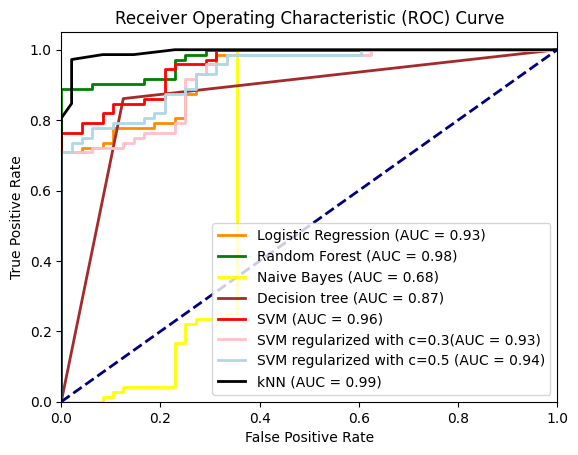

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using ***Entropy*** with combined data

In [ ]:
# Initialize the Logistic Regression Classifier
comb_ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
comb_ent_lr_classifier.fit(c_X_train_ent, c_y_train_ent)

# Evaluate the classifier
fit_and_print(comb_ent_lr_classifier, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.8875
Training Precision: 0.8728070175438597
Training Recall: 0.8883928571428571
Training F1: 0.8805309734513275
Test Accuracy: 0.8833333333333333
Test Precision: 0.8888888888888888
Test Recall: 0.9142857142857143
Test F1: 0.9014084507042254


In [ ]:
# Initialize the Random Forest Classifier
comb_ent_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

fit_and_print(comb_ent_rf_classifier, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.9583333333333334
Training Precision: 0.9473684210526315
Training Recall: 0.9642857142857143
Training F1: 0.9557522123893805
Test Accuracy: 0.9166666666666666
Test Precision: 0.9166666666666666
Test Recall: 0.9428571428571428
Test F1: 0.9295774647887323


In [ ]:
# Initialize the Decision Tree Classifier
comb_ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
comb_ent_dt_classifier.fit(c_X_train_ent, c_y_train_ent)

# Evaluate the classifier
fit_and_print(comb_ent_dt_classifier, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.8916666666666667
Test Precision: 0.8611111111111112
Test Recall: 0.9538461538461539
Test F1: 0.9051094890510949


In [ ]:
# Initialize the Naïve Bayes Classifier
comb_ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
comb_ent_nb_classifier.fit(c_X_train_ent, c_y_train_ent)

# Evaluate the classifier
fit_and_print(comb_ent_nb_classifier, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.8104166666666667
Training Precision: 0.9649122807017544
Training Recall: 0.7260726072607261
Training F1: 0.8286252354048964
Test Accuracy: 0.8333333333333334
Test Precision: 0.9583333333333334
Test Recall: 0.8023255813953488
Test F1: 0.8734177215189873


In [ ]:
comb_ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

#fit_and_print(rf_classifier3, X_train, y_train, X_test, y_test)
fit_and_print(comb_ent_poly_kernel_svm_clf, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
# Define the pipeline with regularization
comb_ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_ent_poly_kernel_svm_clf_regularized, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
# Define the pipeline with regularization
comb_ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_ent_poly_kernel_svm_clf_regularized2, c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
comb_ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(comb_ent_knn_clf,  c_X_train_ent, c_y_train_ent, c_X_test_ent, c_y_test_ent)

Training Accuracy: 0.95625
Training Precision: 0.956140350877193
Training Recall: 0.9519650655021834
Training F1: 0.9540481400437638
Test Accuracy: 0.9083333333333333
Test Precision: 0.875
Test Recall: 0.9692307692307692
Test F1: 0.9197080291970802


In [ ]:
# fill all the models here
comb_ent_voting_clf = VotingClassifier(
    estimators=[('lr', comb_ent_lr_classifier),('rf', comb_ent_rf_classifier), ('dt',comb_ent_dt_classifier), ('nb', comb_ent_nb_classifier),('svm', comb_ent_poly_kernel_svm_clf), ('svc', comb_ent_poly_kernel_svm_clf_regularized), ('svc2', comb_ent_poly_kernel_svm_clf_regularized2), ('knn', comb_ent_knn_clf)],
    voting='soft')

fit_and_print(comb_ent_voting_clf, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.9729166666666667
Training Precision: 0.9868421052631579
Training Recall: 0.9574468085106383
Training F1: 0.9719222462203023
Test Accuracy: 0.9166666666666666
Test Precision: 0.9166666666666666
Test Recall: 0.9428571428571428
Test F1: 0.9295774647887323


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = comb_ent_lr_classifier.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(c_y_test_ent, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = comb_ent_rf_classifier.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(c_y_test_ent, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = comb_ent_dt_classifier.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(c_y_test_ent, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)


# Get predicted probabilities for the positive class
nb_probs = comb_ent_nb_classifier.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(c_y_test_ent, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)


# Get predicted probabilities for the positive class
svm_probs = comb_ent_poly_kernel_svm_clf.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(c_y_test_ent, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = comb_ent_poly_kernel_svm_clf_regularized.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(c_y_test_ent, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = comb_ent_poly_kernel_svm_clf_regularized2.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(c_y_test_ent, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = comb_ent_knn_clf.predict_proba(c_X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(c_y_test_ent, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)


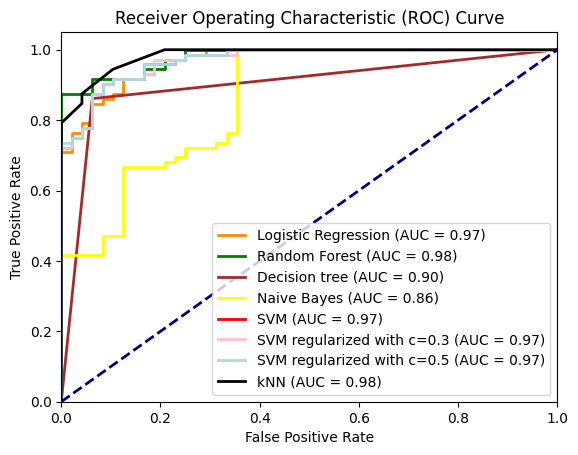

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using ***Katz Fractal Dimension*** with combined data

In [ ]:
# Initialize the Logistic Regression Classifier
comb_kfd_lr_classifier = LogisticRegression()

# Train the classifier on the training data
comb_kfd_lr_classifier.fit(c_X_train_kfd, c_y_train_kfd)

# Evaluate the classifier
fit_and_print(comb_kfd_lr_classifier, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.8270833333333333
Training Precision: 0.9385964912280702
Training Recall: 0.7561837455830389
Training F1: 0.8375733855185911
Test Accuracy: 0.8666666666666667
Test Precision: 0.9722222222222222
Test Recall: 0.8333333333333334
Test F1: 0.8974358974358975


In [ ]:
# Initialize the Random Forest Classifier
comb_kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

fit_and_print(comb_kfd_rf_classifier, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.9416666666666667
Training Precision: 0.9912280701754386
Training Recall: 0.8968253968253969
Training F1: 0.9416666666666667
Test Accuracy: 0.9333333333333333
Test Precision: 0.9722222222222222
Test Recall: 0.9210526315789473
Test F1: 0.9459459459459458


In [ ]:
# Initialize the Decision Tree Classifier
comb_kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
comb_kfd_dt_classifier.fit(c_X_train_kfd, c_y_train_kfd)

# Evaluate the classifier
fit_and_print(comb_kfd_dt_classifier, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.975
Test Precision: 0.9861111111111112
Test Recall: 0.9726027397260274
Test F1: 0.9793103448275863


In [ ]:
# Initialize the Naïve Bayes Classifier
comb_kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
comb_kfd_nb_classifier.fit(c_X_train_kfd, c_y_train_kfd)

# Evaluate the classifier
fit_and_print(comb_kfd_nb_classifier, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.5666666666666667
Training Precision: 0.4517543859649123
Training Recall: 0.553763440860215
Training F1: 0.4975845410628019
Test Accuracy: 0.5416666666666666
Test Precision: 0.4722222222222222
Test Recall: 0.6666666666666666
Test F1: 0.5528455284552845


In [ ]:
comb_kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

#fit_and_print(rf_classifier3, X_train, y_train, X_test, y_test)
fit_and_print(comb_kfd_poly_kernel_svm_clf, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
# Define the pipeline with regularization
comb_kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_kfd_poly_kernel_svm_clf_regularized,  c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
# Define the pipeline with regularization
comb_kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(comb_kfd_poly_kernel_svm_clf_regularized2, c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.8375
Training Precision: 0.6578947368421053
Training Recall: 1.0
Training F1: 0.7936507936507937
Test Accuracy: 0.8166666666666667
Test Precision: 0.6944444444444444
Test Recall: 1.0
Test F1: 0.819672131147541


In [ ]:
comb_kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(comb_kfd_knn_clf,c_X_train_kfd, c_y_train_kfd, c_X_test_kfd, c_y_test_kfd)

Training Accuracy: 0.9708333333333333
Training Precision: 0.9780701754385965
Training Recall: 0.9612068965517241
Training F1: 0.9695652173913044
Test Accuracy: 0.9583333333333334
Test Precision: 0.9861111111111112
Test Recall: 0.9466666666666667
Test F1: 0.9659863945578231


In [ ]:
# fill all the models here
comb_kfd_voting_clf = VotingClassifier(
    estimators=[('lr', comb_kfd_lr_classifier),('rf', comb_kfd_rf_classifier), ('dt',comb_kfd_dt_classifier), ('nb', comb_kfd_nb_classifier),('svm', comb_kfd_poly_kernel_svm_clf), ('svc', comb_kfd_poly_kernel_svm_clf_regularized), ('svc2', comb_kfd_poly_kernel_svm_clf_regularized2), ('knn', comb_kfd_knn_clf)],
    voting='soft')

fit_and_print(comb_kfd_voting_clf, c_X_train_hfd, c_y_train_hfd, c_X_test_hfd, c_y_test_hfd)

Training Accuracy: 0.9729166666666667
Training Precision: 0.9868421052631579
Training Recall: 0.9574468085106383
Training F1: 0.9719222462203023
Test Accuracy: 0.8833333333333333
Test Precision: 0.9027777777777778
Test Recall: 0.9027777777777778
Test F1: 0.9027777777777778


In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = comb_kfd_lr_classifier.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(c_y_test_kfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = comb_kfd_rf_classifier.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(c_y_test_kfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)



# Get predicted probabilities for the positive class
dt_probs = comb_kfd_dt_classifier.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(c_y_test_kfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)


# Get predicted probabilities for the positive class
nb_probs = comb_kfd_nb_classifier.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(c_y_test_kfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)





# Get predicted probabilities for the positive class
svm_probs = comb_kfd_poly_kernel_svm_clf.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(c_y_test_kfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = comb_kfd_poly_kernel_svm_clf_regularized.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(c_y_test_kfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = comb_kfd_poly_kernel_svm_clf_regularized2.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(c_y_test_kfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = comb_kfd_knn_clf.predict_proba(c_X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(c_y_test_kfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

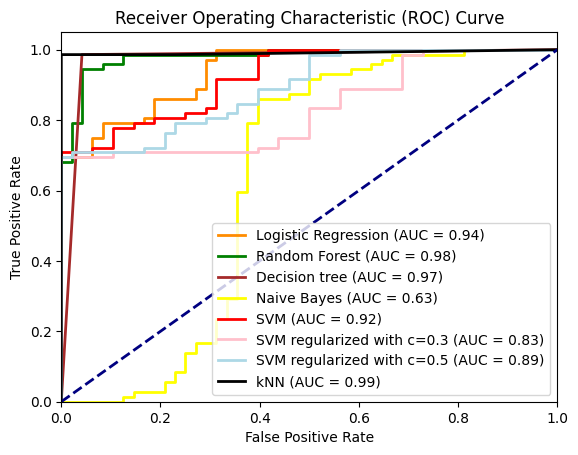

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()